# Import libraries and data

A weather dataset of Cluj Napoca taken from the OpenWheather History API. It was scraped from the Open Weather Map using their Weather API. The data collected was from January 1st 2008 until May 2023 at an hourly rate.

Reference: https://huggingface.co/datasets/LaurentiuStancioiu/Cluj-Napoca-Weather-OpenWeather-data/blob/main/Long%20Term%20Time%20Series%20Forecasting%20for%20Cluj-Napoca%20Weather%20Prediction.pdf


In [ ]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import pygwalker

In [ ]:
ds = load_dataset("LaurentiuStancioiu/Cluj-Napoca-Weather-OpenWeather-data")
df = ds["train"].to_pandas()

View dataset sample records:

In [ ]:
df.sample(20)

# Attribute Understanding

View available attributes.

In [ ]:
df.info()

Add description for each attribute.

!warning PLEASE DOUBLE CHECK.

In [51]:
attribute_dict = {}
attribute_dict['dt'] = 'Time of data calculation, unix, UTC'
attribute_dict['dt_iso'] = 'Date and time in UTC format'
attribute_dict['timezone'] = 'Shift in seconds from UTC'
attribute_dict['city_name'] = 'City name'
attribute_dict['lat'] = 'Geographical coordinates of the location (latitude)'
attribute_dict['lon'] = 'Geographical coordinates of the location (longitude)'
attribute_dict['temp'] = 'Temperature'
attribute_dict['visibility'] = 'Average visibility, metres. The maximum distance at which an object or light can be clearly seen by a human observer under current atmospheric conditions. Lower visibility values may trigger warnings for drivers or pilots.'
attribute_dict['dew_point'] = 'Atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to condense and dew can form'
attribute_dict['feels_like'] = 'This temperature parameter accounts for the human perception of weather'
attribute_dict['temp_min'] = 'Minimum temperature at the moment (optional)'
attribute_dict['temp_max'] = 'Maximum temperature at the moment (optional)'
attribute_dict['pressure'] = 'des'
attribute_dict['sea_level'] = 'des'
attribute_dict['grnd_level'] = 'des'
attribute_dict['humidity'] = 'Humidity, %'
attribute_dict['wind_speed'] = 'des'
attribute_dict['wind_deg'] = 'Wind direction, degrees (meteorological)'
attribute_dict['wind_gust'] = 'des'
attribute_dict['rain_1h'] = 'Rain volume for the last hour, mm'
attribute_dict['rain_3h'] = 'Rain volume for the last 3 hours, mm'
attribute_dict['snow_1h'] = 'Snow volume for the last hour, mm (in liquid state)'
attribute_dict['snow_3h'] = 'Snow volume for the last 3 hours, mm (in liquid state)'
attribute_dict['clouds_all'] = 'Cloudiness, %'
attribute_dict['weather_id'] = 'Weather condition id'
attribute_dict['weather_main'] = 'Group of weather parameters (Rain, Snow, Extreme etc.)'
attribute_dict['weather_description'] = 'Weather condition within the group'
attribute_dict['weather_icon'] = 'Weather icon id'

attribute_dict

{'dt': 'Time of data calculation, unix, UTC',
 'dt_iso': 'Date and time in UTC format',
 'timezone': 'Shift in seconds from UTC',
 'city_name': 'City name',
 'lat': 'Geographical coordinates of the location (latitude)',
 'lon': 'Geographical coordinates of the location (longitude)',
 'temp': 'Temperature',
 'visibility': 'Average visibility, metres. The maximum distance at which an object or light can be clearly seen by a human observer under current atmospheric conditions. Lower visibility values may trigger warnings for drivers or pilots.',
 'dew_point': 'Atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to condense and dew can form',
 'feels_like': 'This temperature parameter accounts for the human perception of weather',
 'temp_min': 'Minimum temperature at the moment (optional)',
 'temp_max': 'Maximum temperature at the moment (optional)',
 'pressure': 'des',
 'sea_level': 'des',
 'grnd_level': 'des',
 'humidity': 'Humidity, %',


Take the first record as an example, here's a data explanation [AI-generated]:

"
This record describes **cold, humid, and snowy winter weather** during the **early hours of January 1, 2008**, in **Cluj-Napoca, Romania**.

* The **temperature** was around **-9.5°C**, with the **"feels like"** temperature matching it, suggesting calm wind conditions with minimal wind chill.
* The **humidity** was high at **92%**, and the **dew point** was close to the actual temperature, indicating **saturation**—ideal for **snow or frost**.
* The **weather condition** was classified as **"light snow"**, supported by 100% **cloud cover** and reduced **visibility** (4 km). This suggests snowfall was occurring but **not heavy**.
* **No recent measurable precipitation** (rain or snow) was recorded in the last 1 or 3 hours, which could imply **light, intermittent snowflakes** without accumulation.
* **Wind was light** (1.0 m/s) from the **east-southeast (110°)**, with **no gusts** reported, contributing to the stable "feels like" temperature.
* **Pressure** was **high (1024 hPa)**, indicating a likely presence of a **cold, stable air mass**, often associated with winter conditions.
* **No data** was available for **sea level and ground-level pressure**, but this is not uncommon for historical or location-specific datasets.

**Summary:**

This was a **quiet, wintry night** with **light snow**, **cold temperatures**, **high humidity**, **calm winds**, and **no significant precipitation** accumulation—typical of **a stable, frosty weather pattern** in a continental climate zone.
"

In [ ]:
print(df.iloc[0])

# Data cleaning

### Date

!warning Not sure what to do with this.

<Axes: xlabel='dt', ylabel='Count'>

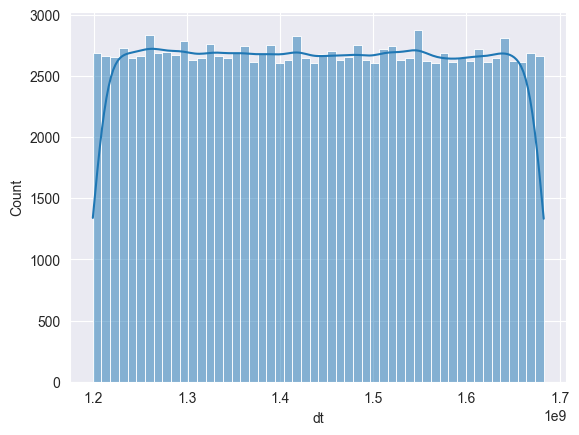

In [50]:
sns.histplot(df['dt'], kde=True)

### City info

Since the dataset is specifically collected for Cluj-Napoca, some attribute seems redundant.

In [ ]:
for i in df.columns[2:6]:
    print(f'Unique values of {i} are {pd.unique(df[i])}')


Except for the timezones, since Cluj-Napoca shifts time in Summer (Daylight saving time), we will remove the others.

In [ ]:
cleaned_df = df.drop(df.columns[2:6], axis=1).copy()
cleaned_df

## Temp

Noticing unusual graphs for Temperature's visualization, we may easily detect outliers as a common sense.

In [ ]:
sns.boxplot(df['temp'])
plt.show()
sns.histplot(df['temp'])

In [ ]:
df['temp'].min(), df['temp'].max()

In [ ]:
# physically unrealistic cutoff
outliers = df[df['temp'] < -100]
outliers

!warning Should we remove them or adjust the value?

In [43]:
cleaned_df[['temp']] # what should we do?

,temp
0,-9.46
1,-9.39
2,-9.39
3,-9.55
4,-9.55
...,...
139389,12.61
139390,10.61
139391,10.07
139392,9.80


## Visibility

At first glance, the visibility data appears reasonable, ranging from a minimum of 49 meters to a maximum of 10,000 meters.  the latter typically indicating perfectly clear conditions with no significant obstructions.


In [41]:
df['visibility'].describe()

count    137498.000000
mean       8693.875169
std        2743.282608
min          49.000000
25%        9999.000000
50%       10000.000000
75%       10000.000000
max       10000.000000
Name: visibility, dtype: float64

<Axes: xlabel='visibility', ylabel='Count'>

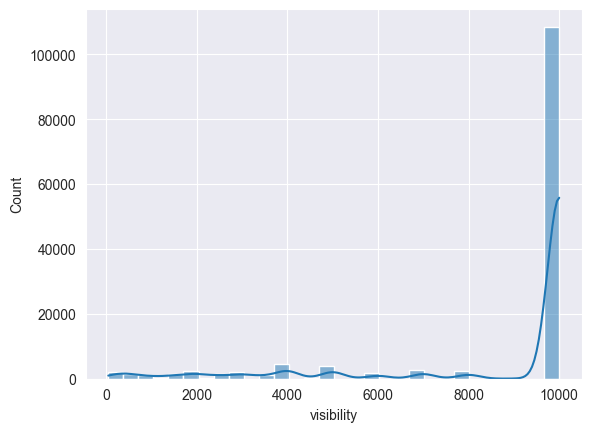

In [38]:
sns.histplot(df['visibility'], bins=30, kde=True)

bb## Dew pointm

## Feels likeb

In [ ]:
##

## Others

In [42]:
cleaned_df.describe()

,dt,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,wind_deg,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id
count,1.393940e+05,139394.000000,137498.000000,139391.000000,139394.000000,139394.000000,139394.000000,139394.000000,0.0,0.0,139394.000000,139394.000000,139394.000000,10915.000000,19027.000000,1847.000000,4572.000000,821.000000,139394.000000,139394.000000
mean,1.440551e+09,9.618191,8693.875169,5.084661,8.529267,8.327400,12.116846,1016.121605,NaN,NaN,75.657396,2.390518,154.977940,5.031590,0.605345,1.859643,0.361105,0.908526,38.215605,728.715253
std,1.396620e+08,47.385004,2743.282608,7.568612,47.556514,47.396329,9.727896,8.178444,NaN,NaN,19.817223,26.828828,117.502033,3.494126,0.876458,3.033603,0.300892,1.108691,38.417129,121.070155
min,1.199146e+09,-9998.770000,49.000000,-24.390000,-10005.770000,-9998.960000,-275.450000,-100.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,0.100000,0.100000,0.000000,200.000000
25%,1.319538e+09,2.240000,9999.000000,-0.450000,0.690000,0.840000,4.700000,1012.000000,NaN,NaN,62.000000,1.030000,60.000000,3.000000,0.180000,0.200000,0.160000,0.200000,0.000000,701.000000
50%,1.440347e+09,9.700000,10000.000000,5.150000,8.800000,8.450000,12.000000,1016.000000,NaN,NaN,81.000000,2.000000,130.000000,5.000000,0.330000,0.800000,0.260000,0.500000,20.000000,800.000000
75%,1.561060e+09,16.910000,10000.000000,11.350000,16.700000,15.750000,19.400000,1021.000000,NaN,NaN,93.000000,3.100000,270.000000,7.000000,0.700000,2.000000,0.450000,1.000000,75.000000,801.000000
max,1.682982e+09,37.610000,10000.000000,25.190000,37.740000,37.000000,42.700000,1044.000000,NaN,NaN,100.000000,9999.000000,360.000000,24.200000,18.000000,27.000000,2.280000,9.000000,100.000000,804.000000


'2023-05-01 23:00:00 +0000 UTC'